In [24]:
import pandas as pd
import seaborn as ns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [10]:
train_df = pd.read_csv("clean-training-set.tsv", header=0, delimiter='\t')
train_df.shape

(25643, 2)

In [11]:
train_set = []
for i in range(train_df["chat"].size):
    train_set.append(train["chat"][i])

In [12]:
test_df = pd.read_csv("clean-testing-set.tsv", header=0, delimiter='\t')
test_df.shape

(25873, 2)

In [13]:
test_set = []
for i in range(test_df["chat"].size):
    test_set.append(test_df["chat"][i])

In [15]:
p_clf = Pipeline([('vect', CountVectorizer(analyzer="word", stopwords="english")),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [16]:
p_clf = p_clf.fit(train_set, train_df["sentiment"])

In [17]:
prediction = p_clf.predict(test_set)

In [19]:
p_clf.score(test_set, test_df["sentiment"])

0.7202875584586248

In [22]:
print(classification_report(test_df["sentiment"], prediction))

             precision    recall  f1-score   support

        -34       0.00      0.00      0.00         1
        -17       0.00      0.00      0.00         1
        -16       0.00      0.00      0.00         2
        -14       0.00      0.00      0.00         4
        -12       0.00      0.00      0.00         1
        -11       0.00      0.00      0.00         1
        -10       0.00      0.00      0.00         6
         -9       0.00      0.00      0.00         8
         -8       0.00      0.00      0.00        21
         -7       0.00      0.00      0.00        15
         -6       0.00      0.00      0.00        50
         -5       0.00      0.00      0.00        72
         -4       0.00      0.00      0.00       193
         -3       0.62      0.01      0.02       414
         -2       0.86      0.06      0.11       670
         -1       0.88      0.28      0.43      1097
          0       0.71      1.00      0.83     16624
          1       0.87      0.41      0.56   

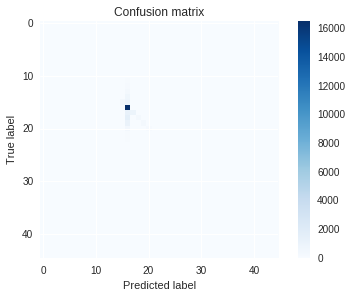

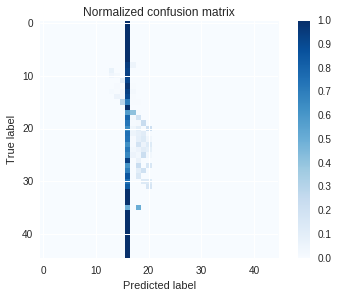

In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(test_df["sentiment"], prediction)
np.set_printoptions(precision=2)
#print('Confusion matrix, without normalization')
#print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print('Normalized confusion matrix')
#print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()